# Lab 7: Supervised Learning - k-Nearest Neighbor (kNN) Algorithm 

In this lab, we will make first steps in doing supervised learning. In particular, we will learn about the k-Nearest Neighbor (kNN) algorithm. kNN uses a simple idea: "you are what your neighbors are". This idea work quite well in data science. In the first part of the lab, we will cover some background needed to understand the kNN algorithm. In the second part, you will be asked to apply your knowledge on another data set. 

## Lab 7.A: kNN Tutorial with Questions (50% of grade)

As usual, let us start by importing the needed libraries. We will continue using the sklearn library, which implements many of the most popular data science algorithms. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Let us load the Iris data set using a sklearn function `load_iris`.

In [2]:
iris = datasets.load_iris()

As you can see from http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html, `iris` is an object with attributes `data` (a 150x4 matrix, where $i$-th row are 4 attributes of the $i$-th flower), `feature_names` (the names of the 4 attributes -- remember that in data science "attribute" and "feature" means the same thing), `target` (a vector of length 150, where $i$-th number is the type of the $i$-th flower -- in data science people often say "label" instead of "target"), `target_names` (these are strings explaining what each of the 3 types of flowers are), and `DESCR` (giving some information about the Iris data set). Let us list them all 

In [3]:
print(iris.DESCR)
print(iris.data)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

So, we can see that the attributes of the second flower are `[4.9, 3.0, 1.4, 0.2]`, which means its `sepal_length` is 4.9 cm, `sepal_width` is 3.0 cm, `petal_length` is 1.4 cm, and `petal_width` is 0.2 cm. We will write it matematically as $x_2 = [x_{21}, x_{22}, x_{23}, x_{24}] = [4.9, 3.0, 1.4, 0.2]$. We see that its `target` is 0, which means the type of this iris is `setosa`. We will write it matematically as $y_2 = 0$. All this information was obtained by real botanists who studied iris flowers trying to understand the physical measurements that discriminate between the 3 different types of those flowers.

In data science, people like to denote this data set as $D_{Iris} = \{(x_i, y_i), i = 1, 2 ... 150\}$, meaning that data set $D_{Iris}$ is a set of 150 labeled examples $(x_i, y_i)$. An alternative is to write $D_{Iris} = \{X_{Iris}, Y_{Iris}\}$.

### Supervised Learning
Supervised learning is a game with the following objective. You are given the iris data set $D_{Iris}$ where you know 4 attributes and target values for 150 irises and your objective is to come up with a computer program that predicts a type of any iris flower given the values of its 4 attributes. Written in pseudocode, this is what you have to do:

`predictor = create(algorithm_type, D)
y_new = predictor(x_new)`

In the first line, you are running a `create` function that takes as input data set `D` and the name of a supervised learning algorithm `algorithm_type` and produces as an output a computer program `predictor`. In the second line, you are using `predictor` to predict the label (`y_new` value) for a flower whose attributes are given by `x_new`.

### kNN Algorithm
kNN is a popular supervised learning algorithm that allows us to create `predictor`. The idea of kNN is that the label of flower `x_new` depends on labels of flowers in its neighborhood. In particular, kNN finds the distance between `x_new` and every example `x` in data set `D`. Then, it looks at the label `y` of k examples which are the closest to `x_new`. The predicted label `y_new` is obtained as the most common label in the group of the k nearest neighbors.

**Parameter choice**. We need to make a few decisions when running kNN. The most important is the choice of `k`. If `k = 1`, then we are looking only at the nearest neighbor and it might not be a good idea if we are dealing with noisy data. If `k` is very large, then we might be counting far neighbors that might have different properties. Other decisions include the choice of distance metric (Euclidean is the standard one) and the choice whether to weight closer neighbors more than the farther ones.

**Accuracy**. When deciding which parameters to pick or which supervised learning algorithm to use (there are popular algorithms other than kNN), the question is how to measure which choice is better. The answer is to check if `predictor` provides accurate prediction. Given a data set `D`, a typical way to check accuracy is to randomly split `D` into two data sets, `D_train` and `D_test`. Then, `predictor` is created/trained using `D_train` data set and its accuracy is checked using `D_test`. In particular, we use `predictor` to predict label of every example from `D_test` and compare it with the true labels. The percentage of the correct guesses on `D_test` is reported as accuracy of `predictor`.

## kNN Demo
The following piece of code is taken from:
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py. Let us run it.

<Figure size 432x288 with 0 Axes>

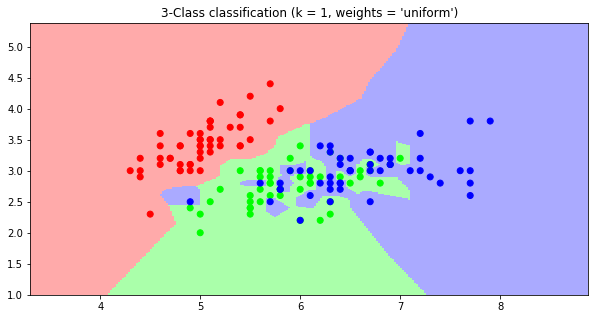

In [4]:
k = 1   # how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the first two features. We could
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(10,5))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

The resulting figure shows the predictions of kNN when $k=1$. If `x_new` is in the blue region, the prediction will be the blue class. From this picture, we can observe a small blue blobs inside the predominantly green area. This is because the nearest neighbor in this area is the blue example. 

**Question 1**. Change value of k to 3 and observe if there is any difference. Discuss what you see and why.

**Question 2**. Change k to an even higher value, let us say to 25. What do we see now? Discuss.

**Queston 3**. In the line that creates `clf` change weights='uniform' to weights='distance'. Check the documentation or google to understand what it means. Explain. Run the code and discuss if you see any difference.

**Question 4**. Take a look at the code and try to understand what each line of the code does. Explain each line of code.

<Figure size 432x288 with 0 Axes>

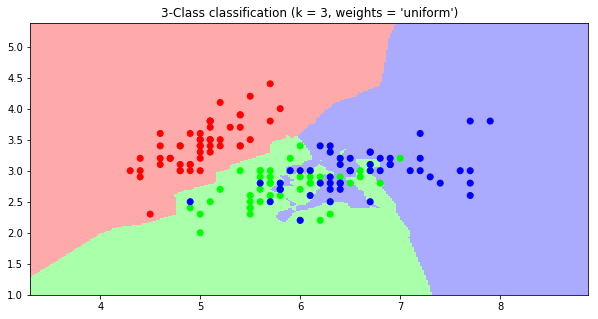

In [5]:
## Answer 1
k = 3

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(10,5))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

#   At k=3, there are differences in the background coloring map where the blobs of blue within the green are now
# reduced to only a few areas between x=(5.8,6.8) and y=(2.0,3.0). This is due to that specific area containing quite
# a few surrounding blue dots within the training data set that resulting in the classification as a blue region.
# Because our k=3, we do not mistake the areas that have one blue dot to be classified as a blue region, such as the
# blue dots at (x,y) coordinates (4.9,2.5),(5.6,2.75), and (5.7,2.5).

<Figure size 432x288 with 0 Axes>

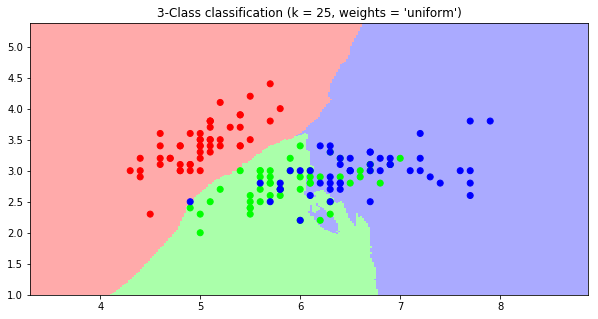

In [6]:
## Answer 2
k = 25

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(10,5))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()


#   At k=25, the classification seems to have improved even more. The numbers of blue areas within green region have
# reduced down to 1. This area situated as an ovular block from x=6.0 to x=6.5 and y=2.0 to y=2.5. I'll admit this
# seems weird because the 2 dots that are enveloped in that area are green colored. However, I understand the reason
# behind this is that the neighboring 25 dots are mostly green. I suppose this results is due to either this data set
# being quite "noisy" as the green and blue dots are too mixed along x=5.5 to x=7 or our number of neigbors is not
# optimal.

<Figure size 432x288 with 0 Axes>

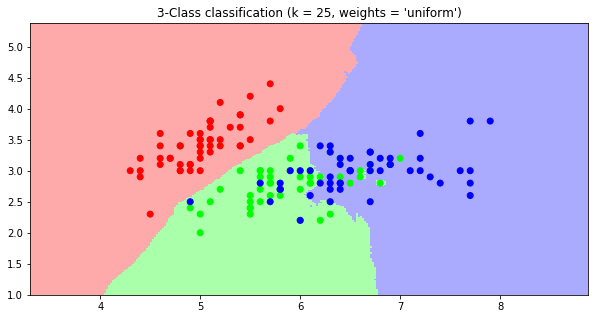

In [7]:
## Answer 3
k = 25

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(10,5))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

#   I left the k number of neighbors at 25 while changing the weights to distance. Weights in kNN-algorithm is a type
# of function we add in predicting the classification of each point. By changing weights= to 'distance' we now weigh
# points by the inverse of their distance. This means the closer neighbors to a point within the data set will have
# greater influence on what type of classification this point is. For example, the ONE blue area within the green
# region we saw at coordinates x=(6.0,6.5) and y=(2.0,2.5) is now changed to green. This, in part, due to the two
# green dots within that originally blue area being so close that the algorithm calculated they should matter more
# in how to classify the mentioned area they are enclosed in. Thus, our algorithm re-classified that area as green
# because the influence of each nearest 25 neighbors being weighed differently. However, there are still flaws in
# using these parameters as I could tell the green dots that are scattered within the blue dots at around x=6.5 to
# x=7 result in the background color changing to green. Once again, I suppose this is due to the data set being
# "noisy".

<Figure size 432x288 with 0 Axes>

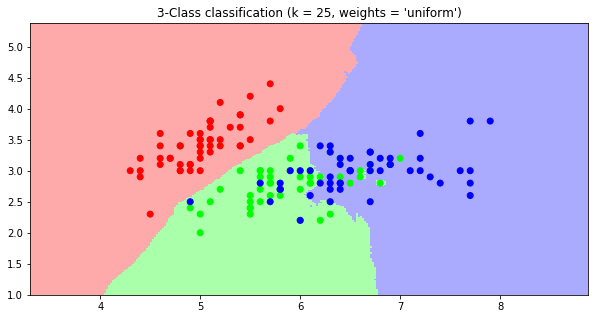

In [8]:
## Answer 4: Explaining the code
k = 25   # Setting the number of nearest neighbors to consult

X = iris.data[:, [0,1]]  # Assigning the values of the first two attributes of each flower to X
y = iris.target          # Assigning the types (numerical value) of each flower to y

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# cmap_light is the array of colors used to color the background map of the resulting classifications
# '#FFAAAA', '#AAFFAA', '#AAAAFF' are html color codes that represent light red, light green, and light blue
# cmap_bold is the array of colors used to color the testing data points within the map
# '#FF0000', '#00FF00', '#0000FF' represent red, green, and blue
# more found here: https://html-color-codes.info/?

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='distance')
clf.fit(X, y)
# Calls the init function of k-nearest (in this case 25) neighbors class with weights function at distance (meaning
# closer neighbors weigh more during classification), and storing the instance within clf. The fit method is then
# called which sets the training data as X while the testing data as y. 

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# This is where max and min values are set for the x- and y- axes to be used later for scaling the colormap.
# The meshgrid method is used to create the coordinate matrix based on the min and max values of `x` and `y`
# spread out across the range by the `h` value which is .02
# Predict is used to return the prediction label of whatever is put in through the parameters. In this case, it is
# the two matrices concatenated together after flattening them out using ravel() method. Basically it's pairing up
# the (x,y) coordinates.

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(10,5))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Reshape the data based on the shape of matrix `xx` and then plot it along the graph with colors on cmap_light.
# This is how the background colors and boundaries are created based on the prediction labels.

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()
# Lastly plot the scatter points along the graph which represent training data with each point's color based on
# the type of each flower that is given by y which is equivalent to the iris.target values.
# The graph is scaled using the xlim and ylim methods based on min and max values (extremities) of xx and yy.

### Training and testing
  As mentioned above, the typical mechanism for testing accuracy of a `predictor` is to split the data randomly into training and testing, train `predictor` on training data and test its performance on test data. Let us see how it can be done.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

**Question 5**. What is the size of the resulting objects?

Now that we created training and test sets, we can train a kNN classifier using the training data. Before moving forward, let us take a second and take a look at the documentation for kNN implementation in sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

Let us train the kNN predictor:

In [10]:
## Answer 5
print(np.shape(X_train)) # size = 200 elements
print(np.shape(X_test))  # size = 100 elements
print(np.shape(y_train))
print(np.shape(y_test))

(100, 2)
(50, 2)
(100,)
(50,)


In [11]:
#from sklearn.neighbors import KNeighborsClassifier
k = 1   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
print(predictor)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


Now that we trained `predictor` we can use it to provide predictions on any example `x`. 

In [12]:
# select the first 4 test examples
i = [0,1,2,3]
x = X_test[i,:]
print(x)
# predict its label
yhat = predictor.predict(x)
# compare predicted and true labels
print(np.array(zip(yhat,y_test[i])))
print(yhat)
print(y_test[i])

[[5.1 3.5]
 [6.  3. ]
 [5.1 3.8]
 [5.4 3.9]]
[0 2 0 0]
[0 2 0 0]


**Question 6**. Did your kNN predictor do a good job in predicting labels of the first 4 test examples? 

**Question 7**. Write a piece of code that calculates the accuracy on those 4 test examples (number of correct guesses divided by the total number of guesses

**Question 8**. Find the predictions on all test examples in `X_test` and calculate the accuracy using your code from *Question 7*.

Pay attention that methods in sklearn.neighbors.KNeighborsClassifier allow you to test the accuracy in a faster way (you should not use it to answer Questions 7 and 8):

In [13]:
accuracy = predictor.score(X_test,y_test)
print(accuracy)

0.72


In [14]:
## Answer 6
for pair in zip(yhat,y_test[i]):
    print(pair)

#   The predictor does a pretty good job in predicting the labels of the first 4 test examples as the correctness
# is generally 75% or 100% accurate within the 4-5 times I reran the entire code beginning from training/testing.
# However, there are 1 or 2 times where the accuracy drops to either 25% or 50% after running it maybe 10+ times.
# Since, these times were rare, I'd still say the kNN predictor did a good job considering how noisy the data is.

(0, 0)
(2, 2)
(0, 0)
(0, 0)


In [15]:
## Answer 7
correct = 0
for index in range(len(i)):
    if yhat[index] == y_test[i][index]:
        correct+=1
accuracy = correct/4
print(accuracy)

1.0


In [16]:
## Answer 8
yhat = predictor.predict(X_test)
correct = 0
for index in range(len(yhat)):
    if yhat[index] == y_test[index]:
        correct+=1
accuracy = correct/len(yhat)
print(accuracy)

0.72


**Question 9**. Train `predictor` using different choices of k. Try $k = 1, 3, 5, 15, 25, 50$. Report the accuracies on the test data (you can use the score method). Which choice of $k$ resulted in the highest accuracy? Comment briefly if the results make sense to you.

**Question 10**. Other than choice of $k$, `KNeighborsClassifier` allows you to make some other choices. For example, in *Question 3* you saw that you can use a weighted prediction. There are few other options. Study the documentation and summarize in few sentences what other options you have when training the kNN classifier.

In [17]:
## Answer 9
num = [1, 3, 5, 15, 25, 50]
for k in num:
    predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
    predictor.fit(X_train, y_train);
    #print(predictor)
    print('prediction accuracy at', k, ':')
    print(predictor.score(X_test, y_test))
    
#   The choice of k that resulted in the highest accuracy was k=25. I ran this code about 10-15 times and only once
# or twice did the best accuracy deviate from that choice of k. This somewhat makes sense as I checked with the
# graphs above to answers 1 to 4. I kept changing the k value and the graph gradually improved until it started to
# stagnate around k=5 and completely ceasing to improve around k=25. I think this is the "overfitting" concept that
# we went over in class regarding how the data eventually ceases to improve when too many values of the data set
# are taken as testing data. Also, when we use k=50 there are too many values used to evaluate the classification of
# each data point leading to some inaccuracies. When k is too small, of course, it is much worse as we are not
# using enough data points to evaluate and too many differently classified points are too close together.

prediction accuracy at 1 :
0.72
prediction accuracy at 3 :
0.76
prediction accuracy at 5 :
0.76
prediction accuracy at 15 :
0.76
prediction accuracy at 25 :
0.82
prediction accuracy at 50 :
0.7


**Answer 10:** <br>
Besides changing the weight function which affects the classification of k neighbors algorithm, one can also choose to change the algorithm itself, the metric, the power parameter, and the metric parameters.
- algorithm: The way in which the data is split and then searched through to find nearest neighbors
    -  Choose between `ball_tree`,`kd_tree`, and `brute` with default at `auto`
- metric: The formula to measure distance between two data points
    -  Default is `minkowski`
- power parameter (optional): only needed if minkowski metric is used to further define the distance formula
    -  `Manhattan` distance when `p=1` and default is `Euclidean` distance when `p=2`
- metric paramters (optional): Used to further distinguish type of metric used
    - Default is `None` but can choose specify when using `minkowski`, `wminkowski`, or `seuclidean` to name a few

<br>I chose not to describe too much about the leaf_size and n_jobs parameters because these seem to define things not related to the results of the classification algorithm. They're more related to runtime and memory space from constructing objects to run the algorithm.

## Lab 7.B Training kNN classifier on Iris and Newsgroups data
In this part of the lab you will use your knowledge to train and test accuracy of kNN classifiers on Iris and Newsgroups data.

#### Iris Questions
In Lab 7.A you used only the first two attributes of Iris for prediction. You have 2 questions:

**Question Iris 1**. Train kNN classifier on other pair of attributes. Use $k$ of your choice and feel free to keep other choices at their default values. Which pair of attributes results in the highest accuracy?

**Question Iris 2**. Train kNN classifier using all 4 attributes. Report the accuracy on test data set. Play with parameters of kNN to try to find a combination that results in the highest accuracy. Can you find something that works better than $k=3$ and default choices?

#### Newsgroups Questions
In Lab you already got experience working with the newsgroups data. 

**Question News 1**. Since kNN is a relatively slow algorithms, create your data set by picking 1,000 examples randomly. Remember to record both attribute values and labels. Split your data into 66% training and 33% test data sets.

**Question News 2**. Train a kNN classifier ($k=3$ and defaults) on the training data and test its accuracy on test data. Record the computational time needed to run this. Report the accuracy (pay attention there are 4 types of documents).

**Question News 3**. Train a kNN classifier using different values of $k$, hoping to improve accuracy. Try to use some other distance other than Euclidean. For example, cosine distance is know to work better than Eucliedean on text data.

**Question Nesw 4**. Transform the original 100 attributes into 5 attributes using SVD. Train and test the kNN on the transformed data. Report the accuracies. You might be surprised to see that accuracy could go up. Discuss why this might be so.


In [18]:
## Question Iris 1
k = 25
attributes_pairs = [[0,2],[0,3],[1,2],[1,3],[2,3]]
for pair in attributes_pairs:
    X = iris.data[:,pair]
    y = iris.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
    predictor.fit(X_train, y_train);
    #print(predictor)
    
    print('prediction accuracy at', pair, ':')
    print(predictor.score(X_test, y_test))

#   I ran the for loop a few times and I noticed the pair of attributes that would result in the best accuracy
# continuously alternated between [1,2] and [1,3]. However, the other times when it was not either of those attributes
# the best accuracy would alternate between pairs [0,2] and [2,3]. I know with certainty that the least accurate pair
# is [0,3] because that was frequently the lowest through all trials.

prediction accuracy at [0, 2] :
0.92
prediction accuracy at [0, 3] :
0.98
prediction accuracy at [1, 2] :
0.94
prediction accuracy at [1, 3] :
0.98
prediction accuracy at [2, 3] :
0.96


In [19]:
## Question Iris 2
trials = 10
total = 0
for i in range(trials):
    k = 5
    X = iris.data
    y = iris.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    #predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
    predictor = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'distance', metric='euclidean')
    predictor.fit(X_train, y_train);
    #print(predictor)

    print('prediction accuracy:')
    print(predictor.score(X_test, y_test))
    #total += predictor.score(X_test, y_test)

#avg = total/trials
#print('Average prediction accuracy of', trials, 'trials:', avg)

#   Unsurprisingly, the average accuracy of the trials stagnates when I keep re-running the data set with all four
# attributes. At higher trials the average accuracy normalizes. Since I wanted to test how well the different
# parameters affected the predictor to either improve or worsen, I set the for loop to 10 trials. However, I was
# surprised here when k=3 actually did better than k=25 while taking all four attributes into the algorithm.
# Meanwhile k=5 did better than k=3. I'm assuming with all the attributes taken into account, the overfitting
# threshold was moved to k=5 as the boundary line where the predictor stops improving significantly. Furthermore,
# the accuracy of each trial was on average better when I changed the parameters to weights= `distance`. Occasionally
# if I added metric = 'euclidean' the accuracy would also be better at k=5.

prediction accuracy:
0.96
prediction accuracy:
1.0
prediction accuracy:
0.96
prediction accuracy:
0.96
prediction accuracy:
0.96
prediction accuracy:
0.92
prediction accuracy:
0.98
prediction accuracy:
0.96
prediction accuracy:
0.94
prediction accuracy:
0.96


In [20]:
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')

In [21]:
## Question News 1
l_rand = []
while len(l_rand) != 1000:
    random_int = np.random.randint(16242)
    if random_int not in l_rand: l_rand.append(random_int)
#print('Double checking length:', len(l_rand))

X = documents[l_rand]
y = newsgroup[l_rand]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print('Checking size')
print('shape of X:', np.shape(X_train))
print('shape of y:', np.shape(y_train))

Checking size
shape of X: (670, 100)
shape of y: (670,)


In [22]:
## Question News 2
import time

k = 3
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
start = time.time()
predictor.fit(X_train, y_train);
end = time.time()
print('Computational time for predictor.fit():', end-start)

print('prediction accuracy:', predictor.score(X_test,y_test))

# The accuracy fluctuates around 0.6. Considering there are 4 types of documents, this isn't too bad especially with
# this massive number of documents.

Computational time for predictor.fit(): 0.0052280426025390625
prediction accuracy: 0.6454545454545455


In [23]:
## Question News 3
num = [5, 15, 25]
for k in num:
    predictor = neighbors.KNeighborsClassifier(n_neighbors = k, metric = 'braycurtis')
    predictor.fit(X_train, y_train);
    #print(predictor)
    print('prediction accuracy at', k, ':')
    print(predictor.score(X_test, y_test))
    
#   Although cosine does result to a good accuracy when I kept running the code a few times, I found that braycurtis
# also does an exceptional job. The braycurtis distance is calculated as so:
#                                   **sum(|x - y|) / (sum(|x|) + sum(|y|))**
# The highest accuracy I've gotten after around 10-20 runs was 0.8 at k=25 and distance = 'braycurtis.'
# I find braycurtis to work in this scenario because it is a good distance formula for integer-value vector spaces,
# which our current matrices can be identified as such.

prediction accuracy at 5 :
0.693939393939394
prediction accuracy at 15 :
0.7212121212121212
prediction accuracy at 25 :
0.7333333333333333


In [24]:
## Question News 4

U, s, V = np.linalg.svd(X, full_matrices = 0)

k = 5
Xk = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))   # rank-5 approximation of X

X_train, X_test, y_train, y_test = train_test_split(Xk, y, test_size=0.33)

num = [5, 15, 25]
for k in num:
    predictor = neighbors.KNeighborsClassifier(n_neighbors = k, metric = 'braycurtis')
    predictor.fit(X_train, y_train);
    #print(predictor)
    print('prediction accuracy at', k, ':')
    print(predictor.score(X_test, y_test)) 
    
#   Generally the accuracies went down. However, by the off chance it does go up, I believe it is due to the fact that
# there are less attributes we're using to compare data points with each. When that is run through the kNN algorithm,
# the data points used may end up improving our predictor as there are less values put through the predictor and
# somtimes that is better as there is less "noise" ran through the algorithm.
# As was also seen throughout this lab, the accuracy of the predictor continuously fluctuated which is normal since
# our train_test_split method randomizes parsing of the matrix into training and testing data sets.

prediction accuracy at 5 :
0.6090909090909091
prediction accuracy at 15 :
0.5818181818181818
prediction accuracy at 25 :
0.5757575757575758
